# Demo Foreground subtractor

Example notebook for subtraction of lens light to reveal faint lensed source features.

In [1]:
from StandAloneRingFinder import *

In [6]:
from astropy.io import fits as pyfits
import pylab as plt
%matplotlib inline
import colorImage

In [7]:
pref=1
ddir="example"#Change to your data directory
imgg=pyfits.open("%s/clip_%s_g.fits"%(ddir,pref))[0].data.copy()#[a:-a,a:-a]
imgr=pyfits.open("%s/clip_%s_r.fits"%(ddir,pref))[0].data.copy()#[a:-a,a:-a]
imgi=pyfits.open("%s/clip_%s_i.fits"%(ddir,pref))[0].data.copy()#[a:-a,a:-a]
imgz=pyfits.open("%s/clip_%s_z.fits"%(ddir,pref))[0].data.copy()#[a:-a,a:-a]

sigg=pyfits.open("%s/clip_%s_weight_g.fits"%(ddir,pref))[0].data.copy()#[a:-a,a:-a]**-0.5
sigr=pyfits.open("%s/clip_%s_weight_r.fits"%(ddir,pref))[0].data.copy()#[a:-a,a:-a]**-0.5
sigi=pyfits.open("%s/clip_%s_weight_i.fits"%(ddir,pref))[0].data.copy()#[a:-a,a:-a]**-0.5
sigz=pyfits.open("%s/clip_%s_weight_z.fits"%(ddir,pref))[0].data.copy()#[a:-a,a:-a]**-0.5

psfg=pyfits.open("%s/clip_%s_psf_g.fits"%(ddir,pref))[0].data.copy()
psfr=pyfits.open("%s/clip_%s_psf_r.fits"%(ddir,pref))[0].data.copy()
psfi=pyfits.open("%s/clip_%s_psf_i.fits"%(ddir,pref))[0].data.copy()
psfz=pyfits.open("%s/clip_%s_psf_z.fits"%(ddir,pref))[0].data.copy()


color = colorImage.ColorImage()
colorimage = color.createModel(imgg,imgr,imgi)

psfmode="dont"
RF=RingFinder(imgg,imgi,sigg,sigi,psfg,psfi,0.265,1e12,1e12,visualize=False,psfmode=psfmode)
RFgz=RingFinder(imgg,imgz,sigg,sigi,psfg,psfz,0.265,1e12,1e12,visualize=False,psfmode=psfmode)
RFrz=RingFinder(imgr,imgz,sigr,sigz,psfr,psfz,0.265,1e12,1e12,visualize=False,psfmode=psfmode)
RFiz=RingFinder(imgi,imgz,sigi,sigz,psfi,psfz,0.265,1e12,1e12,visualize=False,psfmode=psfmode)

(13.0, 13.0)
(16.0, 13.0)
(16.0, 13.0)
(16.0, 13.0)


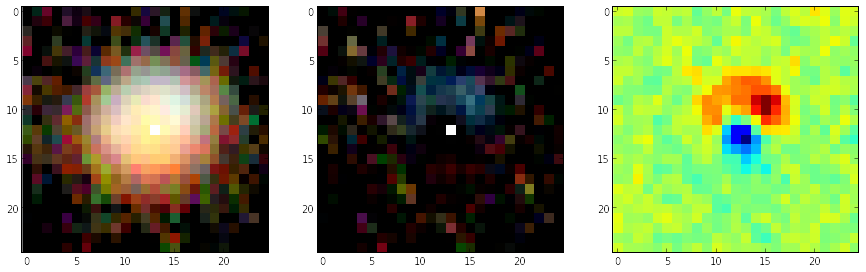

In [12]:
plt.figure(figsize=(15,9))
ax=plt.subplot(1,1,1)
size=colorimage.shape[0]

#RF.Dshow[RF.fitmask]=numpy.nan
plt.subplot(131)
color.bMinusr = 0.8
color.bMinusg = 0.4
color.nonlin = 1.
colored=color.createModel(imgg,imgr,imgi)
plt.imshow(colored,interpolation="none")
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.subplot(132)
colorresid=color.colorize(RFgz.Dshow,RFrz.Dshow,RFiz.Dshow)
d=0
#plt.imshow(RF.Dshow,interpolation="none")
plt.imshow(colorresid,interpolation="none")
#plt.xlim([0,size-20])
#plt.ylim([0,size-20])
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.subplot(133)
plt.imshow(RF.Dshow,interpolation="none")
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)